In [33]:
#3.1) 1 Data Exploration and Understanding:
#Dataset Overview:
#1. Load the dataset and display the first 10 rows.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/oodp/WHR-2024-5CS037.csv')
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [34]:
#2.Identify the number of rows and columns in the dataset.
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")


Number of rows: 143, Number of columns: 9


In [35]:
#List all the columns and their data types.
print("\nColumns and Data Types:")
print(df.dtypes)


Columns and Data Types:
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


In [36]:
#Basic Statistics:
#1. Calculate the mean, median, and standard deviation for the Score column.

mean_score = df['score'].mean()
median_score = df['score'].median()
std_score = df['score'].std()

print(f"\nMean of Score: {mean_score}")
print(f"Median of Score: {median_score}")
print(f"Standard Deviation of Score: {std_score}")


Mean of Score: 5.52758041958042
Median of Score: 5.785
Standard Deviation of Score: 1.1707165099442995


In [37]:
#2. Identify the country with the highest and lowest happiness scores.
highest_score_country = df.loc[df['score'].idxmax(), 'Country name']
lowest_score_country = df.loc[df['score'].idxmin(), 'Country name']

print(f"Country with the highest happiness score: {highest_score_country}")
print(f"Country with the lowest happiness score: {lowest_score_country}")

Country with the highest happiness score: Finland
Country with the lowest happiness score: Afghanistan


In [38]:
#Missing Values:
#1. Check if there are any missing values in the dataset. If so, display the total count for each column.
missing_values = df.isnull().sum()
print("\nMissing Values Count for Each Column:")
print(missing_values[missing_values > 0])


Missing Values Count for Each Column:
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [39]:
#Filtering and Sorting:
#1. Filter the dataset to show only the countries with a Score greater than 7.5.
filtered_df = df[df['score'] > 7.5]
print("\nCountries with a Score greater than 7.5:")
print(filtered_df['Country name'])


Countries with a Score greater than 7.5:
0    Finland
1    Denmark
2    Iceland
Name: Country name, dtype: object


In [40]:
#2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows.
filtered_df = df[df['score'] > 7.5]
sorted_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False)
top_10_countries = sorted_df.head(10)
print("\nTop 10 Countries by GDP per Capita (Descending Order):")
print(top_10_countries[['Country name', 'Log GDP per capita']])



Top 10 Countries by GDP per Capita (Descending Order):
  Country name  Log GDP per capita
1      Denmark               1.908
2      Iceland               1.881
0      Finland               1.844


In [41]:
# Adding New Columns:
# 1.Create a new column called Happiness Category that categorizes countries into three categories based on their Score:
def categorize_happiness(score):
    if score > 6:
        return 'High'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'Low'

df['Happiness Category'] = df['score'].apply(categorize_happiness)
print(df[['Country name', 'score', 'Happiness Category']])

         Country name  score Happiness Category
0             Finland  7.741               High
1             Denmark  7.583               High
2             Iceland  7.525               High
3              Sweden  7.344               High
4              Israel  7.341               High
..                ...    ...                ...
138  Congo (Kinshasa)  3.295                Low
139      Sierra Leone  3.245                Low
140           Lesotho  3.186                Low
141           Lebanon  2.707                Low
142       Afghanistan  1.721                Low

[143 rows x 3 columns]


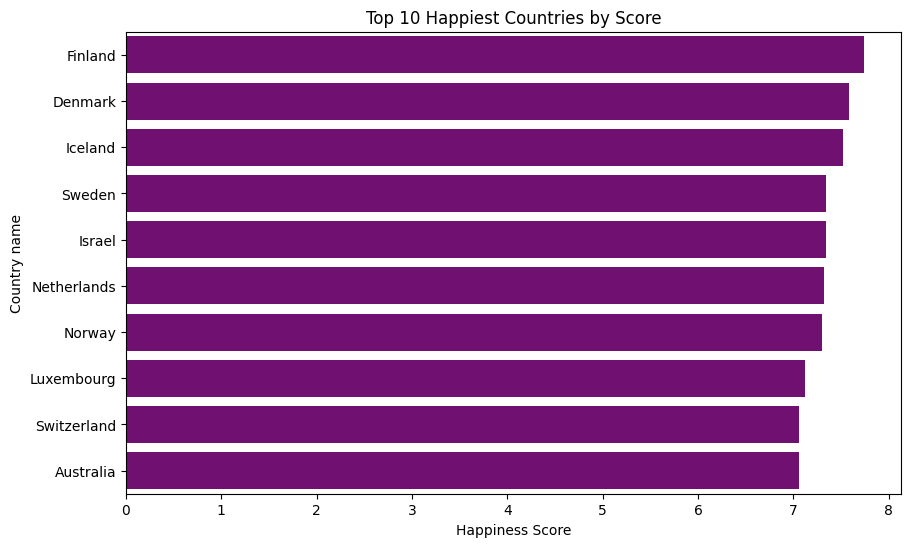

In [42]:
# 2. Data Visualizations:
# • Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.
top_10_happiest = df.nlargest(10, 'score')
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=top_10_happiest, color='purple')
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Happiness Score')
plt.ylabel('Country name')
plt.show()

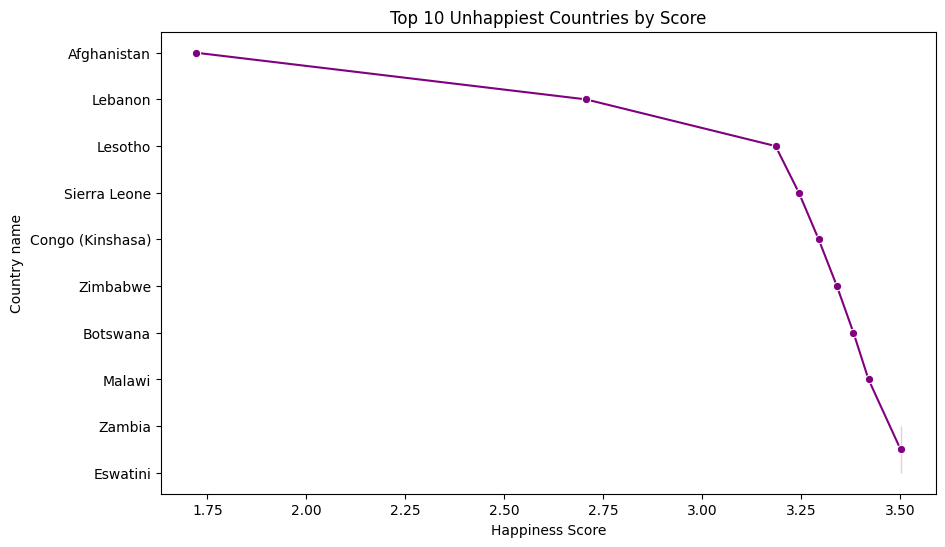

In [43]:
#Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.
top_10_unhappiest = df.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
sns.lineplot(x='score', y='Country name', data=top_10_unhappiest, marker='o', color='Purple')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Happiness Score')
plt.ylabel('Country name')
plt.show()

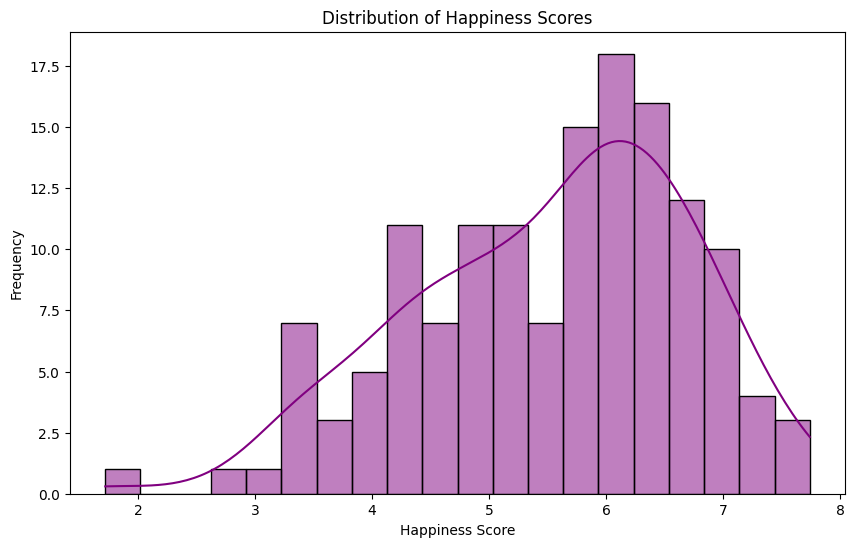

In [44]:
#Plot a histogram for the Score column to show its distribution and also interpret.
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=20, kde=True ,edgecolor= 'black', color='Purple')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

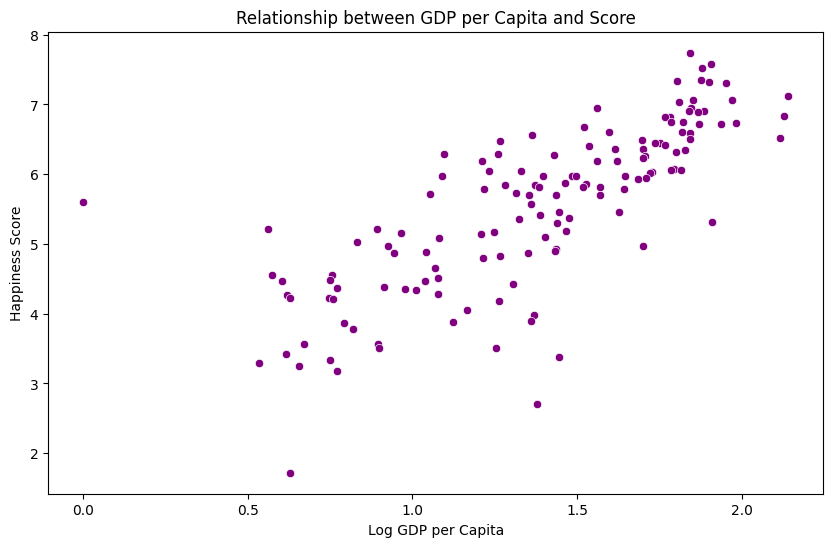

In [45]:
#Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=df, color='Purple')
plt.title('Relationship between GDP per Capita and Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

In [46]:
#3.2) Task 1 Setup Task - Preparing the South-Asia Dataset:
#1.Define the countries in South Asia with a list for example:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# 2.Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
south_asian_df = df[df['Country name'].isin(south_asian_countries)]
print("filtered dataset for south asia countries:")
print(south_asian_df.to_string(index=False))

#3. Save the filtered dataframe as separate CSV files for future use.
output_file_path = '/content/drive/MyDrive/oodp/Datasets/south_asian_countries.csv'
south_asian_df.to_csv(output_file_path, index=False)
print(f"Filtered data saved to {output_file_path}")


filtered dataset for south asia countries:
Country name  score  Log GDP per capita  Social support  Healthy life expectancy  Freedom to make life choices  Generosity  Perceptions of corruption  Dystopia + residual Happiness Category
       Nepal  5.158               0.965           0.990                    0.443                         0.653       0.209                      0.115                1.783             Medium
    Pakistan  4.657               1.069           0.600                    0.321                         0.542       0.144                      0.074                1.907             Medium
       India  4.054               1.166           0.653                    0.417                         0.767       0.174                      0.122                0.756             Medium
   Sri Lanka  3.898               1.361           1.179                    0.586                         0.583       0.144                      0.031                0.014                Low
  Bangl

In [47]:
# Task - 2 - Composite Score Ranking:
# 1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the following metrics:
south_asian_df.loc[:, 'Composite Score'] = (
    0.40 * south_asian_df['Log GDP per capita'] +
    0.30 * south_asian_df['Social support'] +
    0.30 * south_asian_df['Healthy life expectancy']
)
print(south_asian_df[['Country name', 'Composite Score']])

#2. Rank the South Asian countries based on the Composite Score in descending order.
sorted_south_asian_df = south_asian_df.sort_values(by='Composite Score', ascending=False)
print("\nSouth Asian Countries Ranked by Composite Score (Descending Order):")
print(sorted_south_asian_df[['Country name', 'Composite Score']])


    Country name  Composite Score
92         Nepal           0.8159
107     Pakistan           0.7039
125        India           0.7874
127    Sri Lanka           1.0739
128   Bangladesh           0.6774
142  Afghanistan           0.3238

South Asian Countries Ranked by Composite Score (Descending Order):
    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


<ipython-input-47-fc889daa234b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asian_df.loc[:, 'Composite Score'] = (


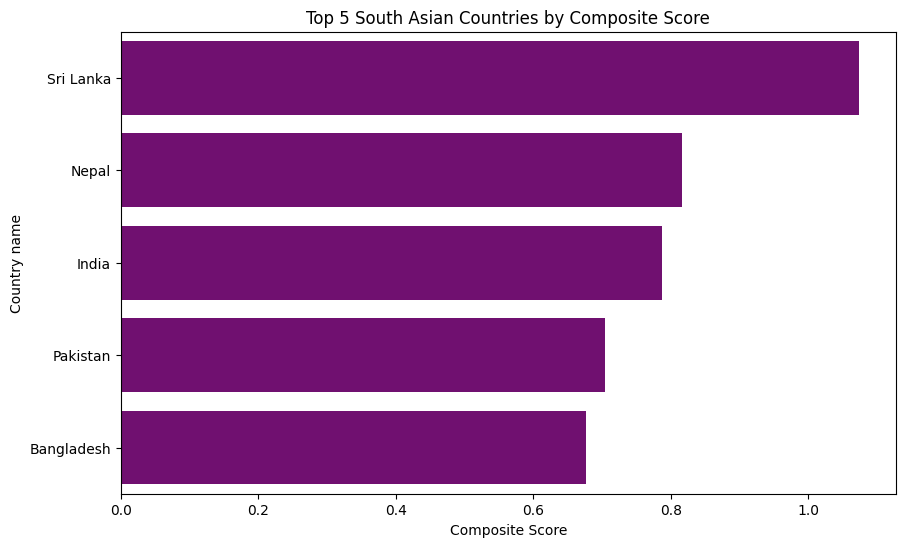

In [48]:
#3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
top_5_countries = sorted_south_asian_df.head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=top_5_countries, color='purple')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country name')
plt.show()


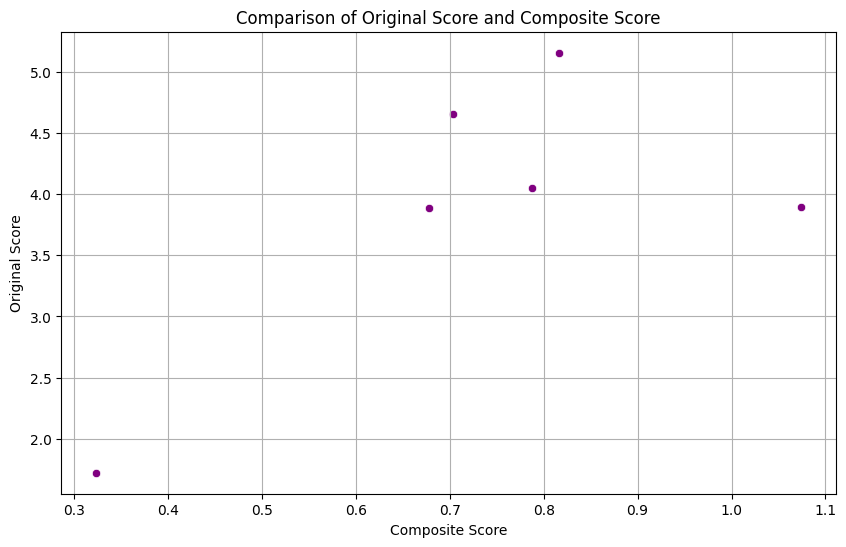

In [49]:
#4. Discuss whether the rankings based on the Composite Score align with the original Score - support your discussion with some visualization plot.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Composite Score', y='score', data=south_asian_df, color='purple')
plt.title('Comparison of Original Score and Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Original Score')
plt.grid(True)
plt.show()

In [114]:
# Task - 3 - Outlier Detection:
# 1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
# 2. Define outliers using the 1.5 × IQR rule.

# Calculate IQR for Score
q1_score, q3_score = south_asian_df['score'].quantile([0.25, 0.75])
iqr_score = q3_score - q1_score
score_outlier_bounds = (q1_score - 1.5 * iqr_score, q3_score + 1.5 * iqr_score)

# Calculate IQR for GDP per Capita
q1_gdp, q3_gdp = south_asian_df['Log GDP per capita'].quantile([0.25, 0.75])
iqr_gdp = q3_gdp - q1_gdp
gdp_outlier_bounds = (q1_gdp - 1.5 * iqr_gdp, q3_gdp + 1.5 * iqr_gdp)

# Identify outliers based on Score and GDP per Capita
outliers = south_asian_df[
    (south_asian_df['score'] < score_outlier_bounds[0]) |
    (south_asian_df['score'] > score_outlier_bounds[1]) |
    (south_asian_df['Log GDP per capita'] < gdp_outlier_bounds[0]) |
    (south_asian_df['Log GDP per capita'] > gdp_outlier_bounds[1])
]

# Display the outliers
print("Outlier Countries based on score:")
print(outliers[['Country name', 'score']])
print("Outlier Countries based on GDP:")
print(outliers[['Country name','Log GDP per capita']])


Outlier Countries based on score:
    Country name  score
142  Afghanistan  1.721
Outlier Countries based on GDP:
    Country name  Log GDP per capita
142  Afghanistan               0.628


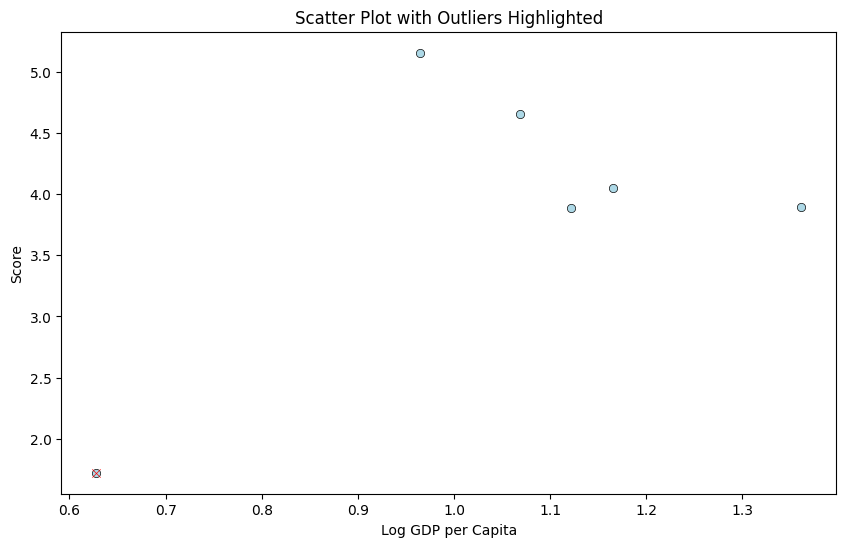

In [51]:
# 3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asian_df, color='lightblue' , edgecolor='black')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers, color='red', marker='x')
plt.title('Scatter Plot with Outliers Highlighted')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.show()


# 4. Discuss the characteristics of these outliers and their potential impact on regional averages.
Discussion:
1. The regional averages for Score and GDP per Capita change significantly when outliers are removed.
2. Outliers in Score suggest countries with extreme happiness or unhappiness compared to the regional norm.
3. Outliers in GDP per Capita highlight economic disparities within the region.
4. Removing outliers provides a more accurate representation of typical trends in South Asia.

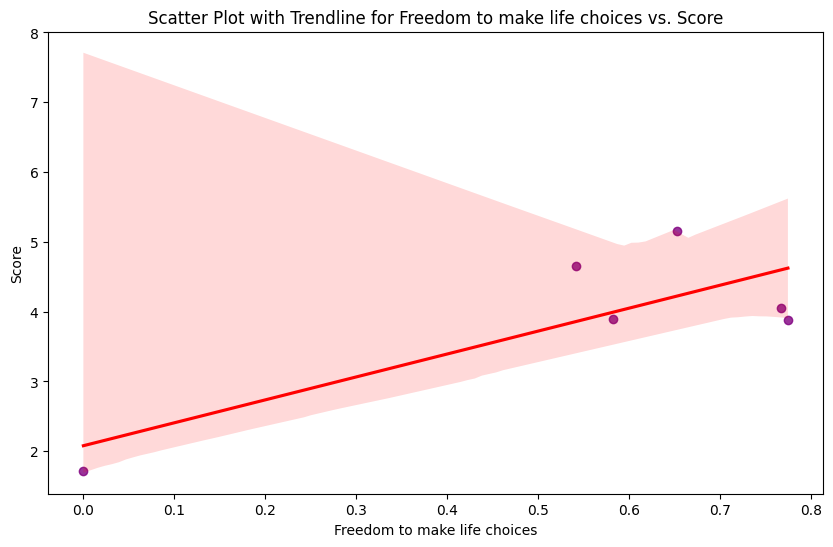

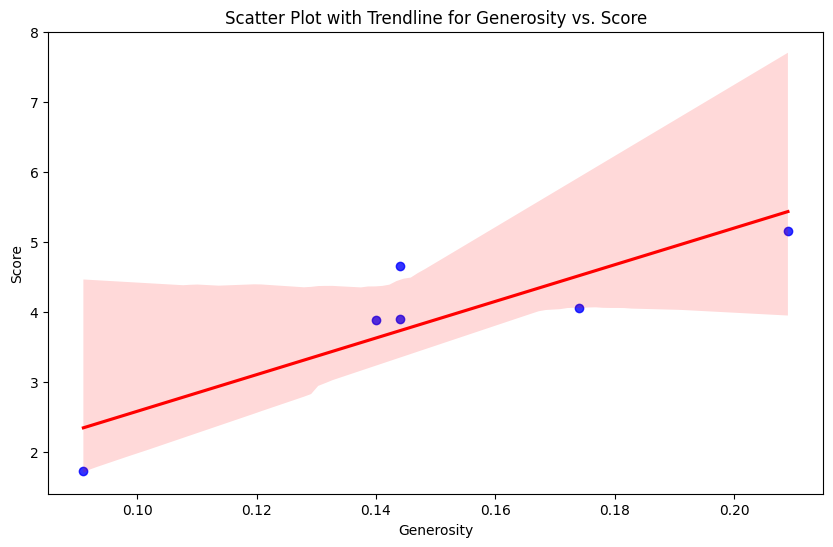

In [68]:
# 2. Create scatter plots with trendlines for these metrics against the Score.
plt.figure(figsize=(10, 6))
sns.regplot(x=metric1, y='score', data=south_asian_df, scatter_kws={'color': 'purple'}, line_kws={'color': 'red'})
plt.title(f'Scatter Plot with Trendline for {metric1} vs. Score')
plt.xlabel(metric1)
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x=metric2, y='score', data=south_asian_df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title(f'Scatter Plot with Trendline for {metric2} vs. Score')
plt.xlabel(metric2)
plt.ylabel('Score')
plt.show()

#3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for South Asian countries.
Discussion:
1. The strongest relationship is between 'Generosity' and Score, with a Pearson correlation of 0.87.
- This means that the association is strong and positive, with high Generosity tending to increase the Score.

2. The weakest relationship is between 'Freedom to make life choices' and Score, with a Pearson correlation of 0.80.
- This implies a weak positive relationship, which means changes in Freedom to make life choices barely influence the Score.

3. These metrics were also visualized using scatter plots (Step 2 above ), which substantiate the findings above since the trendline for the strongest relationship is more obvious compared to the weakest one.

In [67]:
# Task - 5 - Gap Analysis:
# 1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score for each South Asian country.
south_asian_df.loc[:,'GDP-Score Gap'] = south_asian_df['Log GDP per capita'] - south_asian_df['score']
south_asian_df[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']].head()

,Country name,Log GDP per capita,score,GDP-Score Gap
92,Nepal,0.965,5.158,-4.193
107,Pakistan,1.069,4.657,-3.588
125,India,1.166,4.054,-2.888
127,Sri Lanka,1.361,3.898,-2.537
128,Bangladesh,1.122,3.886,-2.764


In [57]:
# 2. Rank the South Asian countries by this gap in both ascending and descending order.
sorted_gap_df = south_asian_df.sort_values(by='GDP-Score Gap', ascending=False)
print("\nSouth Asian Countries Ranked by GDP-Score Gap (Descending Order):")
print(sorted_gap_df[['Country name', 'GDP-Score Gap']])

sorted_gap_df = south_asian_df.sort_values(by='GDP-Score Gap', ascending=True)
print("\nSouth Asian Countries Ranked by GDP-Score Gap (Ascending Order):")
print(sorted_gap_df[['Country name', 'GDP-Score Gap']])


South Asian Countries Ranked by GDP-Score Gap (Descending Order):
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193

South Asian Countries Ranked by GDP-Score Gap (Ascending Order):
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
127    Sri Lanka         -2.537
142  Afghanistan         -1.093


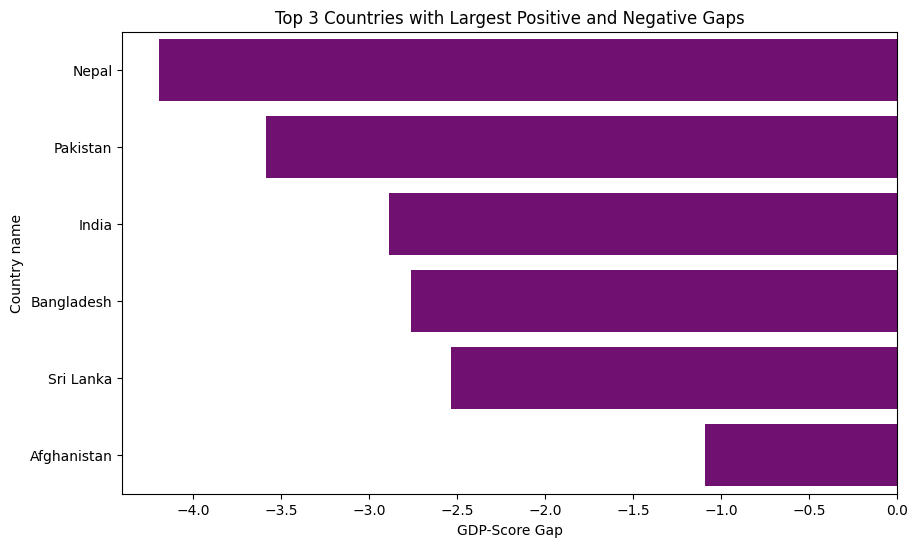

In [58]:
# 3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
top_positive_gaps = sorted_gap_df.head(3)
top_negative_gaps = sorted_gap_df.tail(3)
combined_gaps = pd.concat([top_positive_gaps, top_negative_gaps])

plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=combined_gaps, color='purple')
plt.title('Top 3 Countries with Largest Positive and Negative Gaps')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country name')
plt.show()


# 4. Analyze the reasons behind these gaps and their implications for South Asian countries.
Analysis of GDP-Score Gaps:
1. Positive Gaps:
   - Countries with high positive gaps have significantly higher GDP per Capita relative to their happiness score.
   - This could indicate economic wealth without corresponding improvements in overall happiness, possibly due to social or governance issues.

2. Negative Gaps:
   - Countries with high negative gaps have lower GDP per Capita but higher happiness scores.
   - This might suggest strong social support systems, cultural factors, or effective governance compensating for lower economic output.

Implications for South Asia:
1. Positive gaps highlight the need for equitable distribution of wealth and improvements in quality-of-life metrics.
2. Negative gaps suggest that happiness can be achieved even in lower-income countries through non-economic means.
3. These insights can guide policymakers in prioritizing areas for intervention to improve both economic and social well-being.

In [60]:
# 3.3 Problem - 3 - Comparative Analysis:
# Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
# 1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the following list:
middle_east_countries= [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "State of Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]
middle_east_df = df[df['Country name'].isin(middle_east_countries)]
print("Filtered dataset for Middle Eastern countries:")
print(middle_east_df.to_string(index=False))

output_file_path = '/content/drive/MyDrive/oodp/Datasets/middle_east_countries.csv'
middle_east_df.to_csv(output_file_path, index=False)
print(f"Filtered data saved to {output_file_path}")

Filtered dataset for Middle Eastern countries:
        Country name  score  Log GDP per capita  Social support  Healthy life expectancy  Freedom to make life choices  Generosity  Perceptions of corruption  Dystopia + residual Happiness Category
              Israel  7.341               1.803           1.513                    0.740                         0.641       0.153                      0.193                2.298               High
              Kuwait  6.951               1.845           1.364                    0.661                         0.827       0.200                      0.172                1.884               High
United Arab Emirates  6.733               1.983           1.164                    0.563                         0.815       0.209                      0.258                1.741               High
        Saudi Arabia  6.594               1.842           1.361                    0.511                         0.787       0.114                      0.188    

In [61]:
# 1. Descriptive Statistics:
#  Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
south_asian_mean = south_asian_df['score'].mean()
south_asian_std = south_asian_df['score'].std()

middle_east_mean = middle_east_df['score'].mean()
middle_east_std = middle_east_df['score'].std()

# Which region has higher happiness Scores on average?
print(f"South Asia - Mean: {south_asian_mean}, Std Dev: {south_asian_std}")
print(f"Middle East - Mean: {middle_east_mean}, Std Dev: {middle_east_std}")

if south_asian_mean > middle_east_mean:
    print("South Asia has higher happiness scores on average.")
else:
    print("Middle East has higher happiness scores on average.")



South Asia - Mean: 3.895666666666667, Std Dev: 1.1770690152521504
Middle East - Mean: 5.363636363636363, Std Dev: 1.4944977265106343
Middle East has higher happiness scores on average.


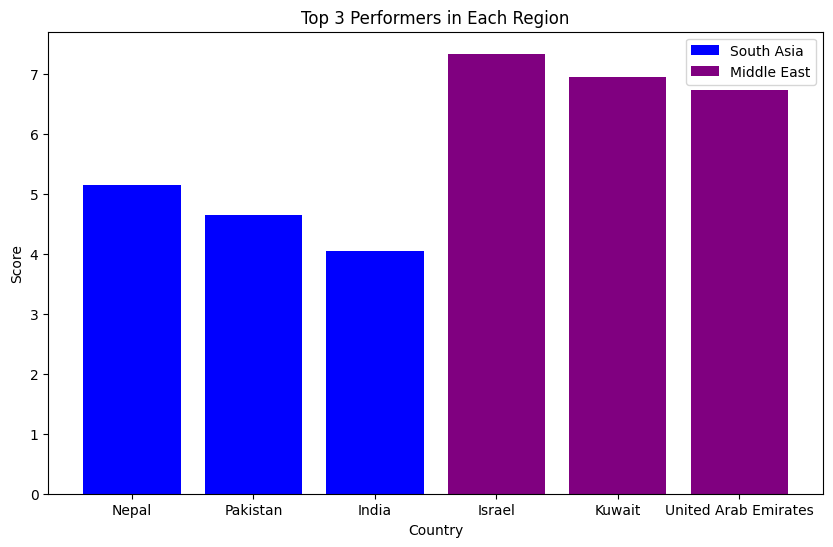

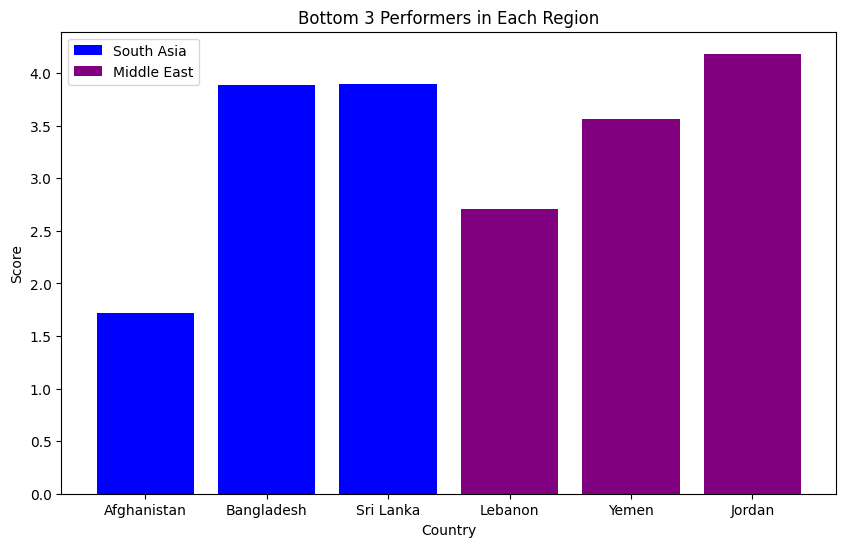

In [62]:
# 2. Top and Bottom Performers:
# • Identify the top 3 and bottom 3 countries in each region based on the score.
south_asia_top3 = south_asian_df.nlargest(3, 'score')
south_asia_bottom3 = south_asian_df.nsmallest(3, 'score')

middle_east_top3 = middle_east_df.nlargest(3, 'score')
middle_east_bottom3 = middle_east_df.nsmallest(3, 'score')

# Plot bar charts comparing these charts.
plt.figure(figsize=(10, 6))
plt.bar(south_asia_top3['Country name'], south_asia_top3['score'], label="South Asia", color='blue')
plt.bar(middle_east_top3['Country name'], middle_east_top3['score'], label="Middle East", color='purple')
plt.title("Top 3 Performers in Each Region")
plt.xlabel("Country")
plt.ylabel("Score")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(south_asia_bottom3['Country name'], south_asia_bottom3['score'], label="South Asia", color='blue')
plt.bar(middle_east_bottom3['Country name'], middle_east_bottom3['score'], label="Middle East", color='purple')
plt.title("Bottom 3 Performers in Each Region")
plt.xlabel("Country")
plt.ylabel("Score")
plt.legend()
plt.show()




<Figure size 1000x600 with 0 Axes>

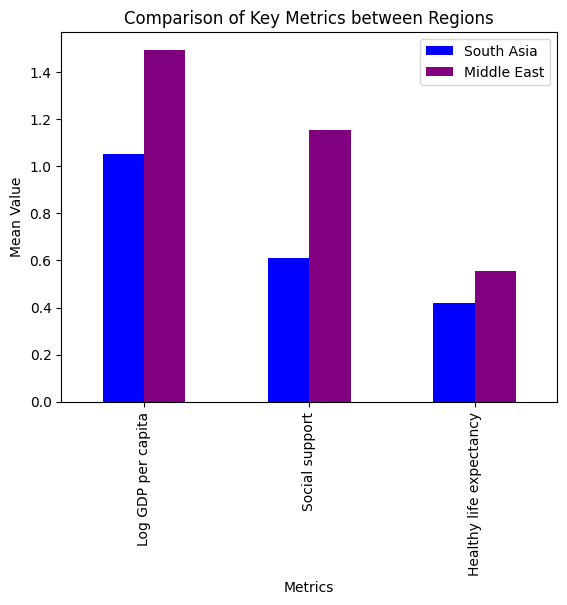

The metric with the largest disparity is: Social support


In [63]:
# 3. Metric Comparisons:
#Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
grouped_data = {
    'South Asia': south_asian_df[metrics].mean(),
    'Middle East': middle_east_df[metrics].mean()}


plt.figure(figsize=(10, 6))
grouped_df = pd.DataFrame(grouped_data)
grouped_df.plot(kind='bar', color=['blue', 'purple'])
plt.title("Comparison of Key Metrics between Regions")
plt.xlabel("Metrics")
plt.ylabel("Mean Value")
plt.show()
# Which metrics show the largest disparity between the two regions?
disparity = abs(south_asian_df[metrics].mean() - middle_east_df[metrics].mean())
largest_disparity_metric = disparity.idxmax()
print(f"The metric with the largest disparity is: {largest_disparity_metric}")

In [64]:
#4. Happiness Disparity:
#Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
south_asian_range = south_asian_df['score'].max() - south_asian_df['score'].min()
middle_east_range = middle_east_df['score'].max() - middle_east_df['score'].min()

south_asian_cv = np.std(south_asian_df['score']) / np.mean(south_asian_df['score'])
middle_east_cv = np.std(middle_east_df['score']) / np.mean(middle_east_df['score'])

print(f"South Asia - Range: {south_asian_range}, CV: {south_asian_cv}")
print(f"Middle East - Range: {middle_east_range}, CV: {middle_east_cv}")

#Which region has greater variability in happiness?
if south_asian_cv > middle_east_cv:
    print("South Asia has greater variability in happiness.")
else:
    print("Middle East has greater variability in happiness.")

South Asia - Range: 3.4370000000000003, CV: 0.27582238871994313
Middle East - Range: 4.634, CV: 0.2656682100228015
South Asia has greater variability in happiness.


South Asia - Correlation with Metrics: Freedom to make life choices    0.800519
Generosity                      0.874512
dtype: float64
Middle East - Correlation with Metrics: Freedom to make life choices    0.863220
Generosity                      0.627524
dtype: float64


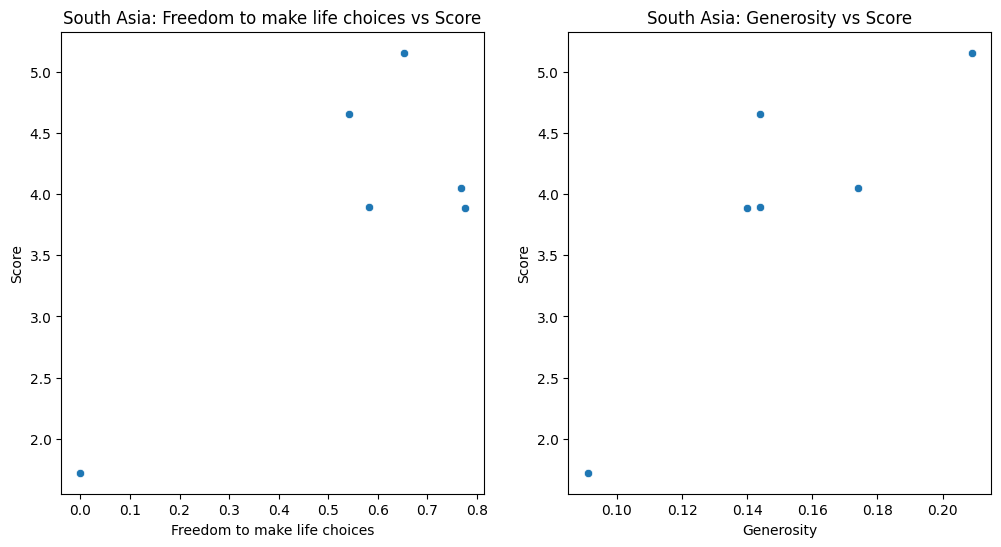

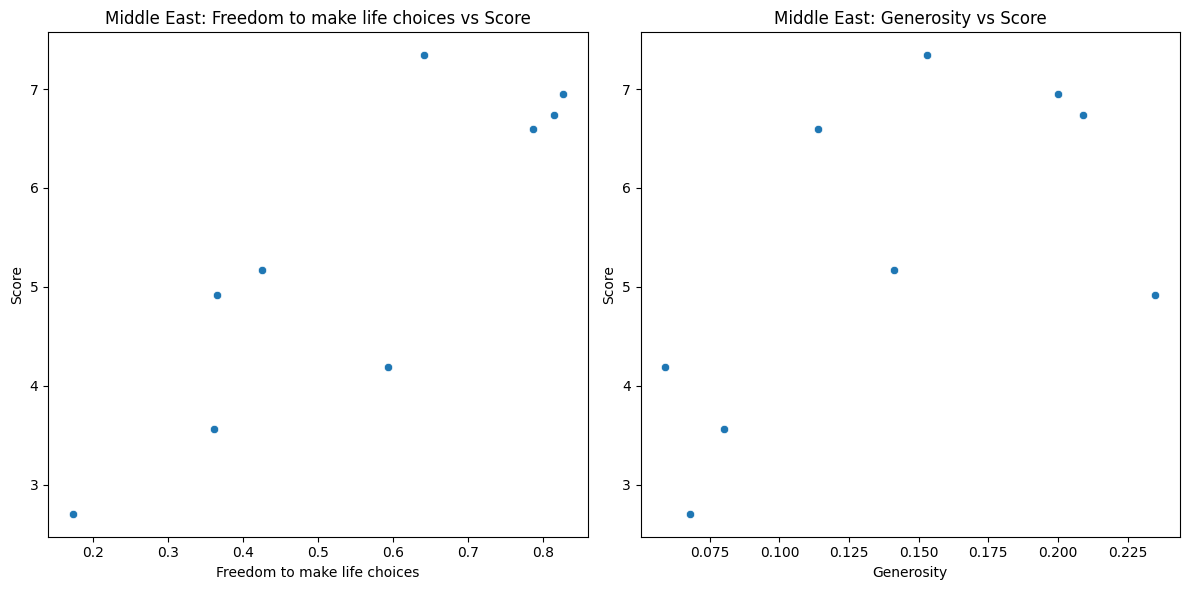

In [65]:
# 5. Correlation Analysis:
#Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.
metrics = ['Freedom to make life choices', 'Generosity']
correlation_south_asian = south_asian_df[metrics].corrwith(south_asian_df['score'])
correlation_middle_east = middle_east_df[metrics].corrwith(middle_east_df['score'])

print(f"South Asia - Correlation with Metrics: {correlation_south_asian}")
print(f"Middle East - Correlation with Metrics: {correlation_middle_east}")

# Create scatter plots to visualize and interpret the relationships.
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, metric in enumerate(metrics):
    sns.scatterplot(data=south_asian_df, x=metric, y='score', ax=axes[i])
    axes[i].set_title(f"South Asia: {metric} vs Score")
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel('Score')

fig2, axes2 = plt.subplots(1, 2, figsize=(12, 6))
for i, metric in enumerate(metrics):
    sns.scatterplot(data=middle_east_df, x=metric, y='score', ax=axes2[i])
    axes2[i].set_title(f"Middle East: {metric} vs Score")
    axes2[i].set_xlabel(metric)
    axes2[i].set_ylabel('Score')

plt.tight_layout()
plt.show()

In [116]:
# 6. Outlier Detection:
# Identify outlier countries in both regions based on Score and GDP per Capita.
q1_score_sa, q3_score_sa = south_asian_df['score'].quantile([0.25, 0.75])
iqr_score_sa = q3_score_sa - q1_score_sa
score_outlier_bounds_sa = (q1_score_sa - 1.5 * iqr_score_sa, q3_score_sa + 1.5 * iqr_score_sa)

# Calculate IQR for GDP per Capita in South Asia
q1_gdp_sa, q3_gdp_sa = south_asian_df['Log GDP per capita'].quantile([0.25, 0.75])
iqr_gdp_sa = q3_gdp_sa - q1_gdp_sa
gdp_outlier_bounds_sa = (q1_gdp_sa - 1.5 * iqr_gdp_sa, q3_gdp_sa + 1.5 * iqr_gdp_sa)

# Identify outliers based on Score and GDP per Capita for South Asia
outliers_sa = south_asian_df[
    (south_asian_df['score'] < score_outlier_bounds_sa[0]) |
    (south_asian_df['score'] > score_outlier_bounds_sa[1]) |
    (south_asian_df['Log GDP per capita'] < gdp_outlier_bounds_sa[0]) |
    (south_asian_df['Log GDP per capita'] > gdp_outlier_bounds_sa[1])
]

# Display the outliers for South Asia
print("Outlier Countries in South Asia based on score:")
print(outliers_sa[['Country name', 'score']])
print("Outlier Countries in South Asia based on GDP:")
print(outliers_sa[['Country name','Log GDP per capita']])


# Outlier detection for Middle East
# Calculate IQR for Score in Middle East
q1_score_me, q3_score_me = middle_east_df['score'].quantile([0.25, 0.75])
iqr_score_me = q3_score_me - q1_score_me
score_outlier_bounds_me = (q1_score_me - 1.5 * iqr_score_me, q3_score_me + 1.5 * iqr_score_me)

# Calculate IQR for GDP per Capita in Middle East
q1_gdp_me, q3_gdp_me = middle_east_df['Log GDP per capita'].quantile([0.25, 0.75])
iqr_gdp_me = q3_gdp_me - q1_gdp_me
gdp_outlier_bounds_me = (q1_gdp_me - 1.5 * iqr_gdp_me, q3_gdp_me + 1.5 * iqr_gdp_me)

# Identify outliers based on Score and GDP per Capita for Middle East
outliers_me = middle_east_df[
    (middle_east_df['score'] < score_outlier_bounds_me[0]) |
    (middle_east_df['score'] > score_outlier_bounds_me[1]) |
    (middle_east_df['Log GDP per capita'] < gdp_outlier_bounds_me[0]) |
    (middle_east_df['Log GDP per capita'] > gdp_outlier_bounds_me[1])
]

# Display the outliers for Middle East
print("Outlier Countries in Middle East based on score:")
print(outliers_me[['Country name', 'score']])
print("Outlier Countries in Middle East based on GDP:")
print(outliers_me[['Country name','Log GDP per capita']])


Outlier Countries in South Asia based on score:
    Country name  score
142  Afghanistan  1.721
Outlier Countries in South Asia based on GDP:
    Country name  Log GDP per capita
142  Afghanistan               0.628
Outlier Countries in Middle East based on score:
Empty DataFrame
Columns: [Country name, score]
Index: []
Outlier Countries in Middle East based on GDP:
Empty DataFrame
Columns: [Country name, Log GDP per capita]
Index: []


from above data we can see thaT middle east has no outlier while in south asia afghanistan is an outlier in both GDP and score

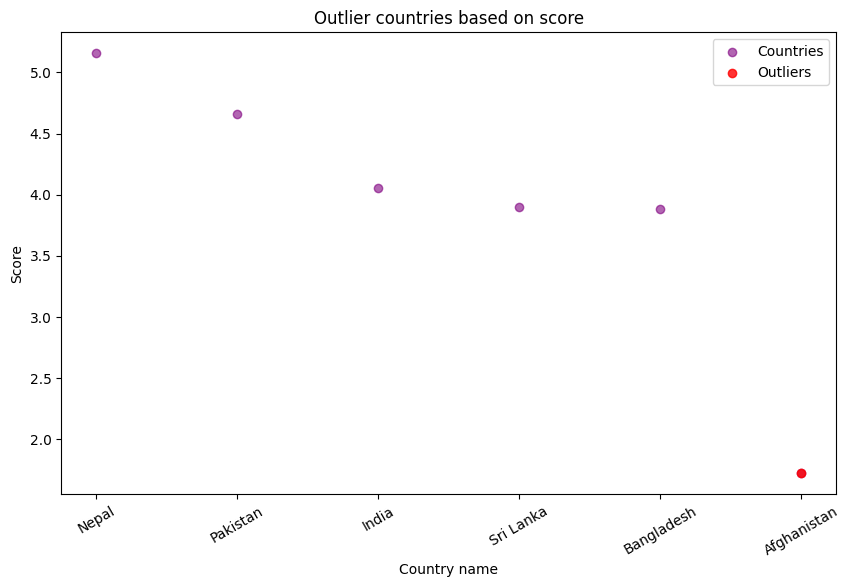

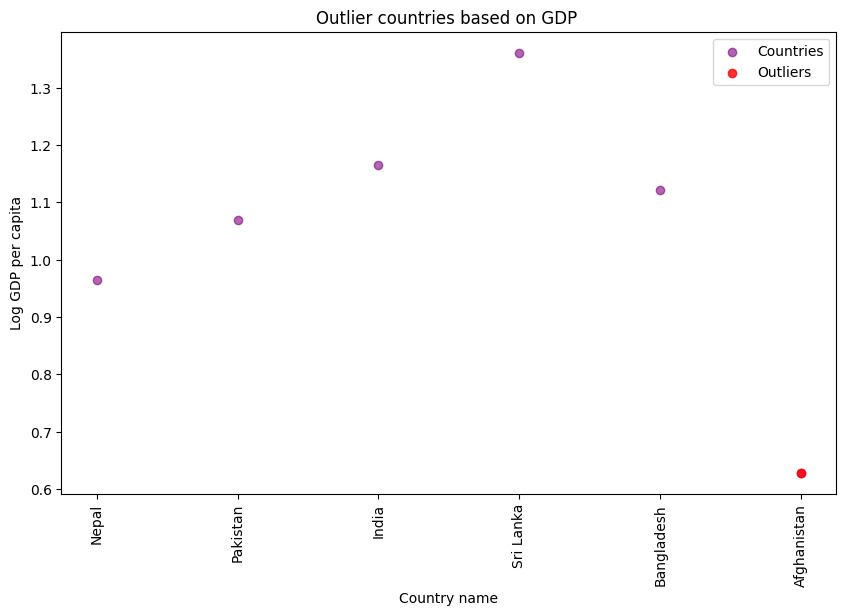

In [126]:
#Plot these outliers and discuss their implications.
plt.figure(figsize=(10, 6))
plt.scatter(south_asian_df['Country name'], south_asian_df['score'], color='purple', alpha=0.6, label='Countries')
plt.scatter(outliers_sa['Country name'], outliers_sa['score'], color='red', alpha=0.8, label='Outliers')
plt.xlabel('Country name')
plt.ylabel('Score')
plt.title('Outlier countries based on score')
plt.xticks(rotation=30)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(south_asian_df['Country name'], south_asian_df['Log GDP per capita'], color='purple', alpha=0.6, label='Countries')
plt.scatter(outliers_sa['Country name'], outliers_sa['Log GDP per capita'], color='red', alpha=0.8, label='Outliers')
plt.xlabel('Country name')
plt.ylabel('Log GDP per capita')
plt.title('Outlier countries based on GDP ')
plt.xticks(rotation=90)
plt.legend()
plt.show()

The two scatter plots show outlier detection based on the happiness score and GDP per capita for South Asia:

Happiness Score Plot: Afghanistan is a clear outlier with a much lower happiness score than other countries, indicating some unique challenges or crises.
GDP Per Capita Plot: Similar trends indicate that economic disparity is related to the outlier in which low GDP corresponds to a low level of happiness.

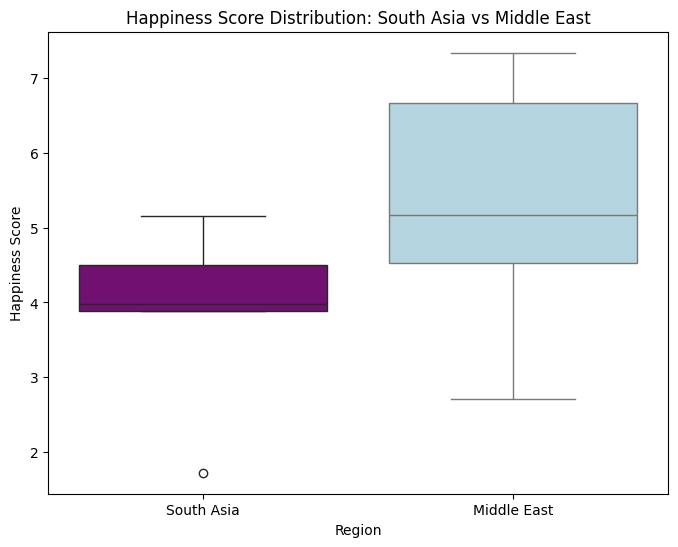

In [130]:
# 7. Visualization:

plt.figure(figsize=(8, 6))
sns.boxplot(data=south_asian_df, x='Region', y='score', color='purple')
sns.boxplot(data=middle_east_df, x='Region', y='score', color='lightblue')
plt.title('Happiness Score Distribution: South Asia vs Middle East')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.show()


#• Interpret the key differences in distribution shapes, medians, and outliers.
Shape of Distribution:
South Asia: The distribution is restricted, with low range in happiness scores. The majority of data points gather around the median, showing that happiness levels are rather constant.
Middle East: The distribution is larger, showing more variation in happiness levels across countries.

Median:
South Asia: The median is lower, showing that South Asian countries have lower overall happiness scores.
Middle East: The median is higher, showing a higher level of happiness in the region.

Outliers:
South Asia: There is one significant outlier below the lower quartile, showing that one country has a much lower happiness score than the others.
Middle East: There are no noticeable outliers, showing a more constant distribution without extreme outliers.